# Sign language dataset handling
Data Analysis - ISAE 2022/2023 - Ahmad Berjaoui

In [13]:
import os #path handling
import numpy as np #numpy arrays operation
import matplotlib.pyplot as plt #plotting and image viewing
import cv2 #import OpenCV for image processing 
#inline plots for nicer viewing
%matplotlib inline 
from sklearn.model_selection import train_test_split #Data set splitting functions
from sklearn.metrics import confusion_matrix #Confusion matrix
from sklearn.linear_model import SGDClassifier 
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

In [5]:
#dataPath = '/home/aib/Desktop/ISAE/solutions/data/signLanguage' # path to folder containing the sign language data
XFile = 'X.npy' # X
YFile = 'Y.npy' # Y

In [6]:
# Load input data and labels
X = np.load(XFile)
Y = np.load(YFile)
print(X.shape)
print(Y.shape)

(2062, 64, 64)
(2062, 10)


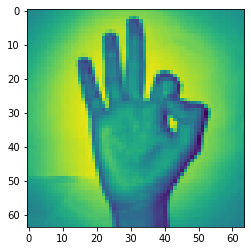

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [7]:
# Display an image and its label
imgIdx = 55
plt.imshow(X[imgIdx])
plt.show()
print(Y[imgIdx])

Let's define a function that converts the one-hot encoded labels to the corresponding sign language value, using the ClassLabels.csv mapping file

In [8]:
def labelToSignNumber(label):
  """
  Convert a one-hot encoded label to the
  corresponding sign language value.
  Mapping is given in the ClassLabels.txt
  file.
  
  Args:
    label: (numpy.array) One-hot encoded label

  Returns: (float) Sign language value
  """
  labelValue = np.argmax(label)
  mapping = {0:9,
             1:0,
             2:7,
             3:6,
             4:1,
             5:8,
             6:4,
             7:3,
             8:2,
             9:5}
  return mapping[labelValue]

Image 55 is a: 9


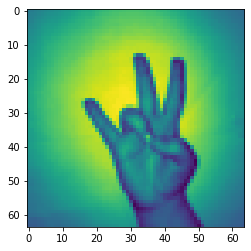

Image 600 is a: 7


In [9]:
# Let's test our function
y55 = labelToSignNumber(Y[55])
print('Image 55 is a: {}'.format(y55))
plt.imshow(X[600])
plt.show()
y600 = labelToSignNumber(Y[600])
print('Image 600 is a: {}'.format(y600))

## Filtering and features construction
Let's apply some edge detectors on an example image

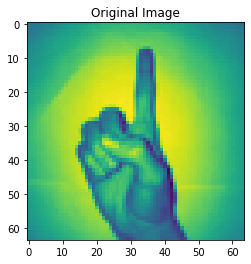

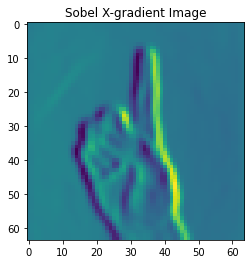

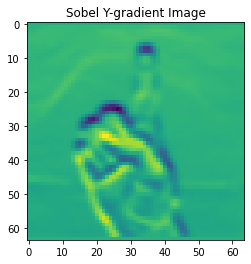

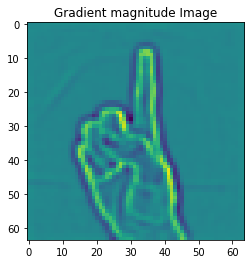

In [10]:
imgIdx = 900 #select an image index
img = X[imgIdx] #get the grayscale image matrix

sobelxImg = cv2.Sobel(img, #source image
                      cv2.CV_64F, #resulting image uses 64 bits float
                      1, #apply a Sobel filter along the X direction
                      0, #
                      ksize=5) #use a 5x5 kernel for filtering

sobelyImg = cv2.Sobel(img, #source image
                      cv2.CV_64F, #resulting image uses 64 bits float
                      0, #
                      1, #apply a Sobel filter along the Y direction
                      ksize=5) #use a 5x5 kernel for filtering

laplacianImg = cv2.Laplacian(img, #source image
                             cv2.CV_64F, #resulting image uses 64 bits float
                             ksize=5) #use a 5x5 kernel for to compute gradient magnitude

# let's display the images
def displayImg(_img,title=""):
  plt.imshow(_img)
  plt.title(title)
  plt.show()

displayImg(img,"Original Image")
displayImg(sobelxImg,"Sobel X-gradient Image")
displayImg(sobelyImg,"Sobel Y-gradient Image")
displayImg(laplacianImg,"Gradient magnitude Image")

## SGD

In [14]:
# Let's split the data into training data, and test data. Same splitting should be applied to classes.
# Here, the test data size is 10% of the full dataset
trainData,testData,trainY,testY = train_test_split(X,Y,test_size=0.1)

In [15]:
scaler = StandardScaler()
trainData = scaler.fit_transform(trainData)
testData = scaler.transform(testData)

# Initialize and fit SGDClassifier
sgd_classifier = SGDClassifier()
sgd_classifier.fit(trainData, trainY)


ValueError: Found array with dim 3. StandardScaler expected <= 2.

In [ ]:
# Standardize features
scaler = StandardScaler()
trainData = scaler.fit_transform(trainData)
testData = scaler.transform(testData)

# Initialize and fit SGDClassifier
sgd_classifier = SGDClassifier()
sgd_classifier.fit(trainData, trainY)
